In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle  
import pandas as pd

images = []
labels  = []
TRAIN_DIR = '../input/food41/images'
IMG_SIZE = (224,224) # Image resolution
BATCH_SIZE = 32

# **DATA PROCESSING**

In [3]:

# # Looping through the train file to get the classes and lable 
# img_path = []
# for filename in os.listdir(TRAIN_DIR):
#     IMG_DIR = os.path.join(TRAIN_DIR, filename)
#     for image_file in os.listdir(IMG_DIR):
#         img_path.append(os.path.join(IMG_DIR, image_file))
#         labels.append(filename)



# num_classes = np.unique(labels)
# lb = LabelEncoder()
# labels = pd.DataFrame(labels)
# labels = lb.fit_transform(labels[0])

# img_path = np.array(img_path)
# labels = np.array(labels, dtype = 'int32')

# print(img_path.shape, len(images))
# print(labels.shape, len(labels))
# print(num_classes)

From the dataset directory, we split it into train_data (80%) and valid_data (20%)

In [4]:
# generator = tf.keras.preprocessing.image.ImageDataGenerator(
#         rescale=1./255,
#         rotation_range=30,
#         shear_range=0.3,
#         horizontal_flip=True,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         zoom_range=0.25,
#         validation_split=0.3
# )
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    image_size=(224, 224),
    batch_size= BATCH_SIZE,
    shuffle = True,
    subset='training',
    seed = 123,
    label_mode = 'categorical',
)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    image_size=(224, 224),
    batch_size= BATCH_SIZE,
    shuffle = False,
    subset='validation',
    seed = 123,
    label_mode = 'categorical',
)

print(len(train_data))
print(len(valid_data))

Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.
2525
632


# ****Creating Model****

In the last Dense model, the 101 number represented for the number of classes in the data set

In [5]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224, 224),
  layers.experimental.preprocessing.Rescaling(1 /255)
])

# Data augmentation to reduce overtraining
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

model = tf.keras.Sequential([
        #resize_and_rescale,
        data_augmentation,
        tf.keras.applications.EfficientNetB0(
            input_shape=(224, 224, 3),
            weights='imagenet',
            include_top=False,
            drop_connect_rate=0.5
        ),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(101, activation='softmax') # Sigmoid is not used for many lables, uses softmax instead and the 101 number represented for the numbers of classes in the dataset
])

16711680/16705208 [==============================] - 0s 0us/step


In [6]:
# x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=25)

# y_train = keras.utils.to_categorical(y_train, len(num_classes))
# y_test = keras.utils.to_categorical(y_test, len(num_classes))

In [7]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(
    train_data, 
    validation_data=valid_data,
    epochs= 20,
)

Epoch 1/20
2525/2525 [==============================] - 1547s 608ms/step - loss: 2.2800 - accuracy: 0.4469 - val_loss: 1.2789 - val_accuracy: 0.6591
Epoch 2/20
2525/2525 [==============================] - 1091s 432ms/step - loss: 1.2640 - accuracy: 0.6677 - val_loss: 1.1508 - val_accuracy: 0.6863
Epoch 3/20
2525/2525 [==============================] - 919s 364ms/step - loss: 1.0861 - accuracy: 0.7096 - val_loss: 1.1602 - val_accuracy: 0.6896
Epoch 4/20
2525/2525 [==============================] - 902s 357ms/step - loss: 0.9564 - accuracy: 0.7403 - val_loss: 0.9981 - val_accuracy: 0.7288
Epoch 5/20
2525/2525 [==============================] - 899s 356ms/step - loss: 0.8731 - accuracy: 0.7604 - val_loss: 0.8485 - val_accuracy: 0.7718
Epoch 6/20
2525/2525 [==============================] - 901s 357ms/step - loss: 0.7926 - accuracy: 0.7812 - val_loss: 0.8575 - val_accuracy: 0.7702
Epoch 7/20
2525/2525 [==============================] - 909s 360ms/step - loss: 0.7271 - accuracy: 0.7979 - va

In [8]:
scores = model.evaluate(valid_data)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

632/632 [==============================] - 74s 117ms/step - loss: 0.5510 - accuracy: 0.8528
Test loss: 0.5510191321372986
Test accuracy: 0.8527722954750061


# Visualize the model's accurency and loss

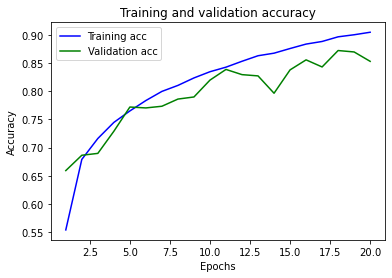

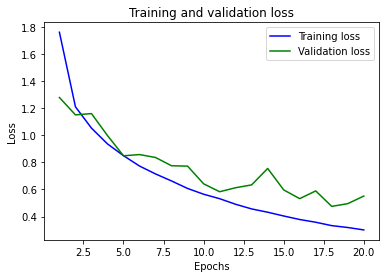

In [9]:
# Plotting Results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Reference
1. https://www.tensorflow.org/tutorials/images/classification
2. https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
3. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
4. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
5. https://www.kaggle.com/arjunrao2000/beginners-guide-efficientnet-with-keras
6. https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/